# Charge 2: Intro à Qiskit & Intrication

Dans ce notebook, nous allons explorer le module Qiskit d'IBM et l'appliquer à des concepts clés de l'info quantique vus en classe.

## 0) Setup de base

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Importer les librairies standards de Qiskit et charger notre compte IBM Q
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
provider = IBMQ.load_account()

In [2]:
# Pour la première fois seulement.
# Copier-coller le `TOKEN` de IBMQ Experience/My account
#IBMQ.save_account('TOKEN')

In [3]:
# Charger notre compte IBM Q du Hub pour avoir accès à tous les ordis quantiques.
# Optionel, pour les membres du Hub ayant complété le formulaire seulement.
provider = IBMQ.get_provider(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')

Regardons les machines auquelles nous avons accès

In [4]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_rochester') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_cambridge') from IBMQ(hub='ibm-q-sherbrooke', group='etudiants-udes', project='phq637-phy737')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q-sherbrooke', grou

## 1) Construction de notre premier circuit

On utilise simplement les fonctions ``QuantumCircuit``, ``QuantumRegister`` et ``ClassicalRegister`` de Qiskit.

In [2]:
# Circuit avec 3 qubits
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)

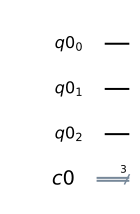

In [3]:
# Visualisation du circuit
circuit.draw(output='mpl')

Rien de fancy, juste 3 qubits et un registre classique de 3 bits pour stocker les résultats de mesure.

Ajoutons des portes pour rendre ce circuit intéressant. Préparons l'état GHZ d'intrication maximale pour 3 qubits:

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

Par défaut, les qubits sont initiés dans l'état $|0\rangle$.
On crée d'abord un état de superposition du premier qubit (qubit avec l'indice **0**) en applicant une porte Hadamard $H$.
Cet opération fait passer l'état du qubit 0 à $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.

In [4]:
# En qiskit, on ajoute les opérations une-à-une au circuit
circuit.h(0)

Il ne reste plus qu'à "étendre" cette superposition en intricant les 2 autres qubits avec des portes contrôle-non (CNOT ou CX).

In [5]:
# Premier CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible,
# créant un état de Bell.
circuit.cx(0, 1)
# Premier CNOT avec le qubit 0 comme contrôle et le qubit 2 comme cible,
# créant un état GHZ.
circuit.cx(0, 2)

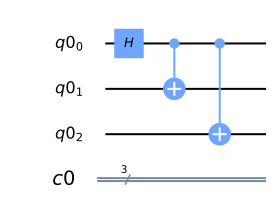

In [6]:
# On visualise
circuit.draw(output='mpl')

Ensuite, on ajoute des opérations de mesure des 3 qubits afin d'extraire une information de notre circuit.

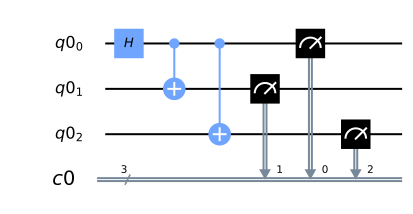

In [7]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

On peut enfin simuler l'excécution de ce circuit sur un ordinateur quantique.
Pour ce faire, on utilise le package ``Aer`` qui contient les simulateurs de circuits parfaits (sans erreurs).

In [9]:
# On a le choix entre les outils de simulation suivant
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator


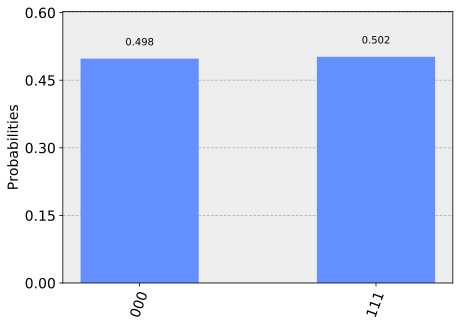

In [10]:
# On choisit notre simulateur
simulator = Aer.get_backend('qasm_simulator')
# On exécute notre circuit et on prend le résultat
result = execute(circuit, backend = simulator, shots=2048).result()
# On illustre les résultats
plot_histogram(result.get_counts(circuit), title='GHZ State counts')

Pour l'état GHZ $|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}$, on s'attend bien à obtenir les deux bitstrings observés 50/50.

Maintenant que ce passe-t'il si l'on excécute ce circuit sur un ordinateur quantique réel?

## 2) Réalisation du circuit sur des qubits supraconducteurs

IBM Q offre un accès ouvert à tous d'exécuter des circuits (jobs) sur leurs ordinateurs quantiques via le cloud.

Comme l'Université de Sherbrooke fait maintenant partie d'un IBMQ Hub, on a un accès privilégié à toutes les processeurs en ligne, dont ``manhattan`` qui contient **65 qubits**.

Choissons ici un processeurs plus petit selon l'accès actuel qu'on peut voir sur le *home page* de quantum-computing.ibm.com.

In [5]:
# On choisit ici un processeur avec 16 qubits qui est disponible
# Remplacer 'ibmq_16_melbourne' par le nom de n'importe quel autre dispositif disponible.
backend = provider.get_backend(name='ibmq_16_melbourne')
# On définit la job qu'on fait exécuter sur la machine.
job = execute(circuit, backend, shots=2048)
# On monitore la progression de ce travail.
qiskit.tools.monitor.job_monitor(job)
# On extrait le résultat
result = job.result()
# On illustre le résultat
print(result.get_counts())
plot_histogram(result.get_counts(circuit))

Job Status: job has successfully run
{'100': 101, '010': 36, '101': 45, '110': 84, '001': 36, '111': 664, '011': 204, '000': 878}


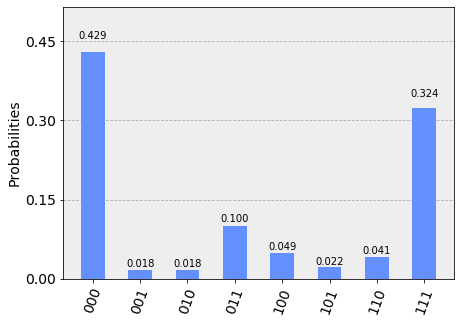

In [7]:
plot_histogram(result.get_counts(circuit))

On voit qu'il y a du bruit causant des erreurs inattendues dans nos résultats. C'est pour ça qu'il faut continuer la recherche et qu'on a besoin de vos talents!

Beaucoup plus qu'une question d'ingénérie et de fabrication, il y a de la belle physique à découvrir pour rendre ces dispositifs plus performants et progresser vers un ordinateur quantique tolérant aux fautes.

## Bonus) Vérifier analytiquement que le circuit suivant prépare bien l'état $|W_3\rangle$
Où on se rappelle que $|W_3\rangle = \left(|001\rangle+|010\rangle+|100\rangle\right)/\sqrt{3}$

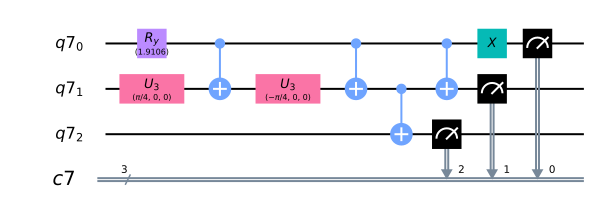

In [30]:
import numpy as np
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.ry(np.arccos(-1/3), qr[0])
circuit.cry(np.pi/2, qr[0], qr[1])
circuit.cx(qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.x(0)
circuit.measure(qr, cr)
circuit.draw(output='mpl')

**Note:** Ici, Qiskit compile directement notre circuit en portes qu'il est possible d'exécuter sur les ordinateurs quantiques d'IBM. Ce circuit est totalement équivalent à celui codé explicitement.

On peut vérifier sa validité aisément à l'aide de Qiskit:
i) En simulant le résultat de multiples mesures projectives

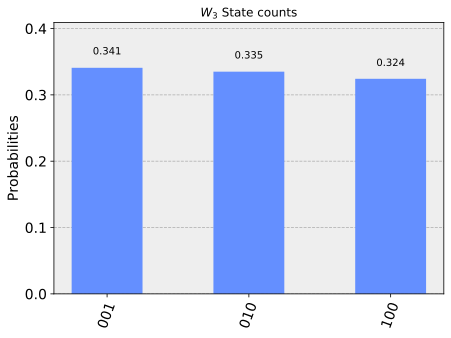

In [28]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=2048).result()
plot_histogram(result.get_counts(circuit), title='$W_3$ State counts')

ii) En simulant le vecteur d'onde au complet (ce qui devient rapidement très dur lorsqu'on a beaucoup de qubits) 

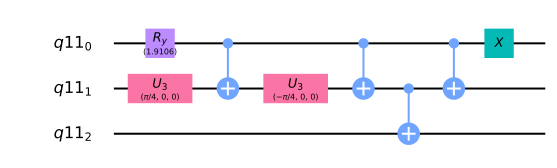

In [39]:
import numpy as np
qr = QuantumRegister(3)
circuit = QuantumCircuit(qr)
circuit.ry(np.arccos(-1/3), qr[0])
circuit.cry(np.pi/2, qr[0], qr[1])
circuit.cx(qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.x(0)
circuit.draw(output='mpl')

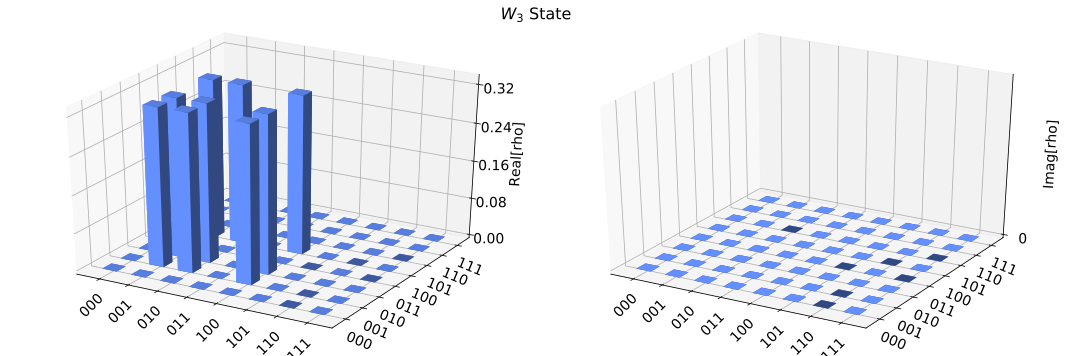

In [41]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, simulator).result()
plot_state_city(result.get_statevector(circuit), title='$W_3$ State')

On retrouve bien l'état $|W_3\rangle = \left(|001\rangle+|010\rangle+|100\rangle\right)/\sqrt{3}$.